## Task-3 : Exploratory Data Analysis - Retail
#### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
### Author: Vansheta Sharma

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [251]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [252]:
type(data)

pandas.core.frame.DataFrame

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [254]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [255]:
data.shape

(9994, 13)

#### Looking for any duplicate values asnd removing them

In [256]:
data.duplicated().sum()

17

In [257]:
data.drop_duplicates(inplace=True)

In [258]:
data.shape

(9977, 13)

In [259]:
data.duplicated().sum()

0

#### Dropin *Postal Code* column since it wouldn't be really helpful with EDA 

In [260]:
data.drop(['Postal Code'], axis=1, inplace=True)

In [261]:
data.head(5) # postal code droppped

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Finding all the unique va;lues in columns that would help us with EDA

In [262]:
data.iloc[:,[0,1,2,3,4,5,6,7,8]].nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
dtype: int64

In [263]:
data.head(3)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [264]:
print(data['Ship Mode'].nunique())
print(data['Segment'].nunique())
print(data['Country'].nunique())
print(data['Region'].nunique())
print(data['Category'].nunique())
print(data['Sub-Category'].nunique())

4
3
1
4
3
17


In [265]:
print(data['Ship Mode'].unique())
print(data['Segment'].unique())
print(data['Country'].unique())
print(data['Region'].unique())
print(data['Category'].unique())
print(data['Sub-Category'].unique())


['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


## Exploratory Data Analysis

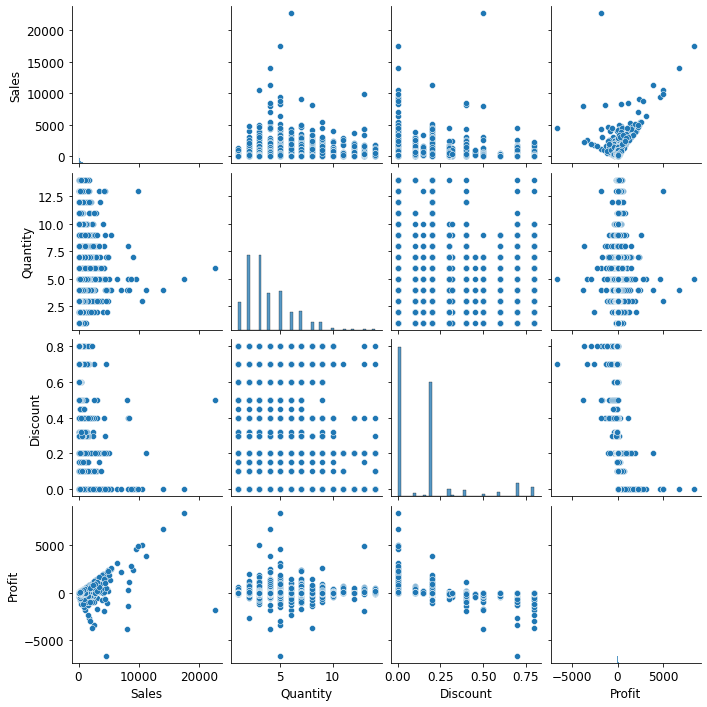

In [266]:
sns.pairplot(data)

In [267]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

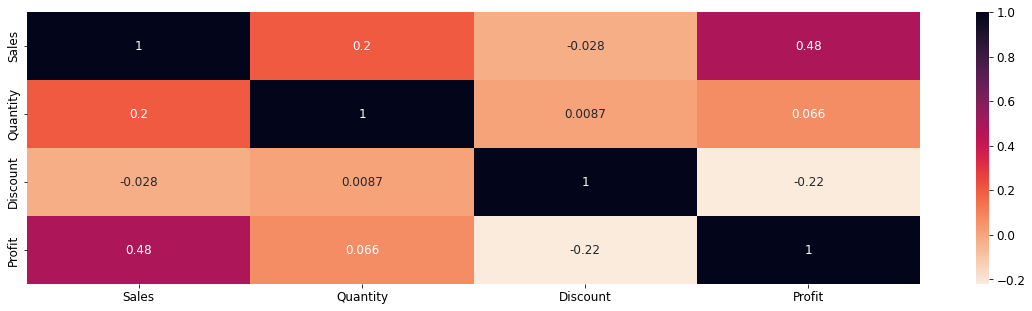

In [268]:
sns.heatmap(data.corr(),cmap='rocket_r',annot=True)

` ~here in heatmap we see the dark portion show more correlation and light portion show less correlation
  ~from above we conclude that:
     -profit is more-moderate correlate with Sales
      -also profit is moderate correlate with quantity
      -and profit is negatively correlate with the discount`

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

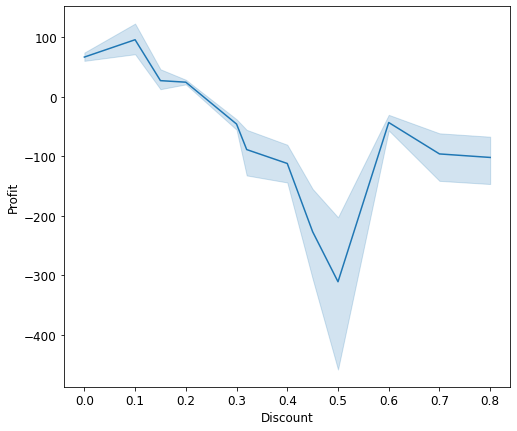

In [269]:
plt.figure(figsize=(8,7))
sns.lineplot(df['Discount'],df['Profit'],data=df)

`here we get relation between Discount and Profit
Here we see around less than 25% discount gives a profit but after 25% we are in loss.`

## Creating a Dataframe with Loss only

In [270]:
loss_df=data[data['Profit'] < 0]

In [271]:
loss_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [272]:
loss_df.shape

(1869, 12)

In [273]:
# Statistical description of the superstore loss data
loss_df.describe()

,Sales,Quantity,Discount,Profit
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,250.627190,3.764045,0.480813,-83.527549
std,715.426811,2.142032,0.235053,284.565230
min,0.444000,1.000000,0.100000,-6599.978000
25%,12.544000,2.000000,0.200000,-58.687200
50%,71.088000,3.000000,0.400000,-18.106800
75%,285.480000,5.000000,0.700000,-6.286000
max,22638.480000,14.000000,0.800000,-0.089500


In [274]:
total_loss= -(loss_df['Profit'].sum())
print("Total loss = %.2f" %total_loss)

Total loss = 156112.99


In [275]:
loss_df.groupby(by='Segment').sum()

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,247196.2460,3651,476.76,-84945.7112
Corporate,131856.9743,2188,271.20,-44780.9706
Home Office,89368.9985,1196,150.68,-26386.3081


` It can be seen that most of the loss occurs in the consumer part where the maximum amount of discount was provided.
So we can say that more the discount more the loss, so to reduce the loss we need to minimize the discount rate`

In [276]:
loss_df.groupby(by='Category').sum()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,257604.2148,2650,261.84,-60924.0502
Office Supplies,91605.1110,3422,546.40,-56609.0215
Technology,119212.8930,963,90.40,-38579.9182


` Maximum losses cause is the product for office supplies, and minimum is in technology. To see further what are the solution to reduce this loss we will explore the data futher`

In [277]:
loss_df.groupby(by='Sub-Category').sum().sort_values('Profit', ascending=True)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Binders,36137.0490,2453,451.60,-38504.2594
Tables,104978.5460,757,74.15,-32412.1483
Machines,72456.2530,157,25.60,-30118.6682
Bookcases,48072.7408,422,37.99,-12152.2060
Chairs,91707.0840,874,61.10,-9868.7825
Appliances,3382.5340,235,53.60,-8629.6412
Phones,35797.8400,476,46.60,-7530.6235
Furnishings,12845.8440,597,88.60,-6490.9134
Storage,37869.0720,569,32.20,-6426.3038


` We can observe more loss in the Binders category, machines category, and tables category when compared to other categories.

Binders are more getting sold. So even giving less discount may lead to vast loss.

So better to give discounts on which are getting less sold so that even they will start getting sold more. `

In [278]:
loss_df.groupby(by='Region').sum().sort_values('Profit', ascending=True)

,Sales,Quantity,Discount,Profit
Region,,,,
Central,141279.0948,2800,406.34,-56308.6480
East,160582.6400,1986,246.80,-49578.5487
South,91635.1850,1004,127.35,-27504.8323
West,74925.2990,1245,118.15,-22720.9609


` The Central region shows the maximum loss here and west region shows the least amount of loss`

In [279]:
loss_df.groupby(by='City').sum().sort_values('Profit',ascending=True).head(10)

,Sales,Quantity,Discount,Profit
City,,,,
Philadelphia,70460.5510,892,115.30,-19590.7411
Houston,37640.7304,683,104.14,-14785.3668
Chicago,19906.4480,538,87.40,-11114.3901
San Antonio,17395.1450,139,17.10,-7831.0254
Lancaster,7699.2420,71,9.40,-7632.4946
Burlington,12044.8740,19,2.00,-5999.3318
Dallas,9994.0562,280,39.30,-4208.5218
Jacksonville,31146.2710,154,18.85,-4059.9857
New York City,19533.8020,132,12.20,-3966.0226


`The above-mentioned list shows the names of the top 10 cities where loss is high.`

In [280]:
loss_df.sort_values(['Sales'],ascending=True).groupby(by='Category').mean()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,361.296234,3.716690,0.367237,-85.447476
Office Supplies,103.508600,3.866667,0.617401,-63.964996
Technology,439.899974,3.553506,0.333579,-142.361322


`While calculating an average, we observed that more loss is in the technology category.`

In [281]:
data.sort_values(['Segment'],ascending=True).groupby('Segment').sum()

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.160833e+06,19497,820.51,134007.4413
Corporate,7.060701e+05,11591,476.85,91954.9798
Home Office,4.292927e+05,6732,261.83,60279.0015


Here Consumer segment sales might be less when compared to other segments, but this is the only segment that provides the highest profits. So, if we increase sales in this Segment by advertisements or something else then, for sure, we can gain more profits.

## Visualizations

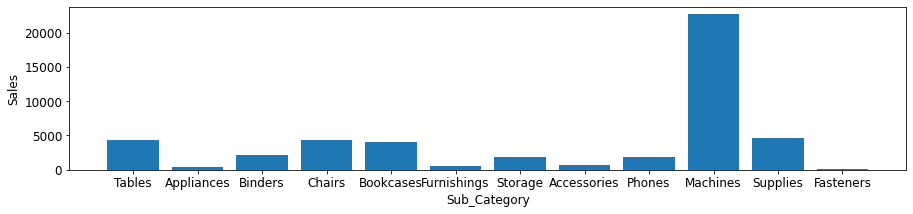

In [282]:
plt.rcParams['figure.figsize']=(15,3)
plt.bar(loss_df['Sub-Category'],loss_df['Sales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');
#Here, we observed that the Sales for Fasteners, Appliances, Furnishings, and Accessories is very low.

In [ ]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(data['Sub-Category'],data['Sales']);
plt.rcParams.update({'font.size':15});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');
#When it comes to comparison in overall supermarket data, Fasteners, Labels, Furnishings, Art, paper, Envelopes, etc.,
#sub-categories have very fewer sales, that’s why it needs to be improved.

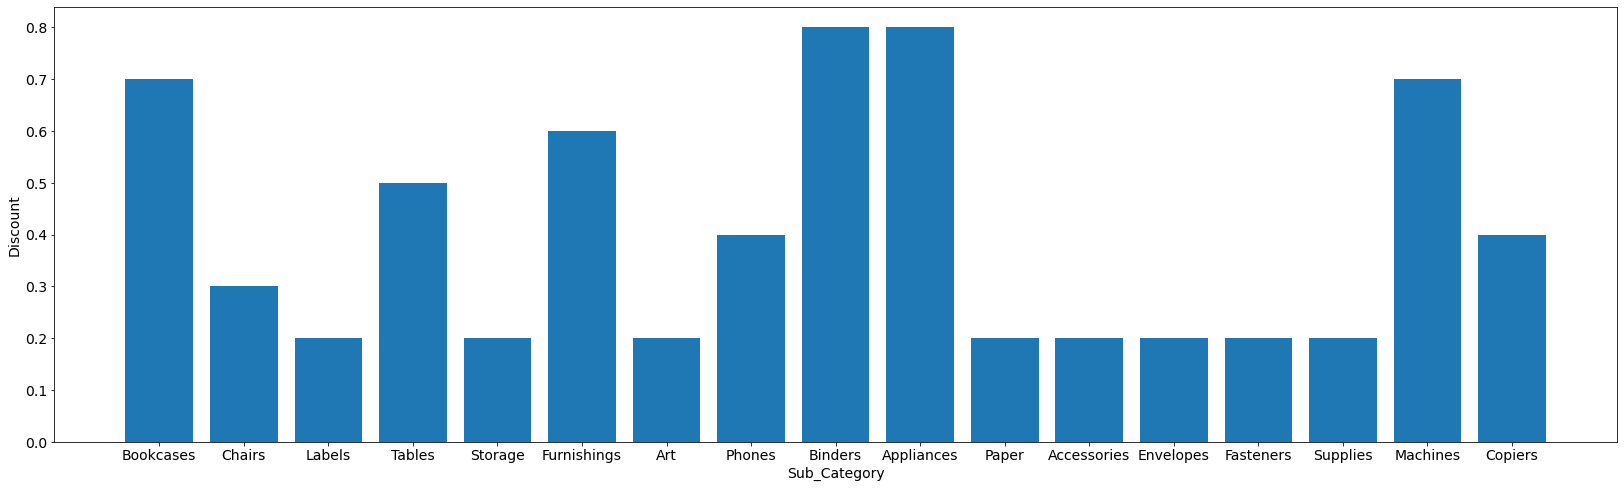

In [284]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(data['Sub-Category'],data['Discount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Discount');
# here when we see that the discount has been provided the amount of sales has increadsed

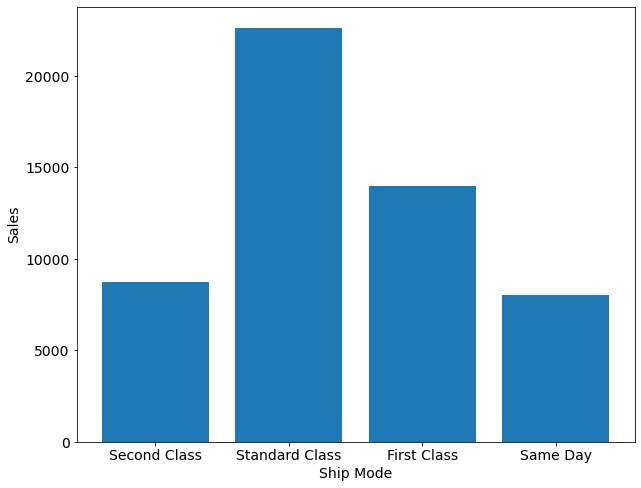

In [285]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(data['Ship Mode'],data['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Ship Mode');
plt.ylabel('Sales');
#Here we observe that the sales are high if the ship mode is standard class, and sales are low if the ship mode is 
#either second class or same day.

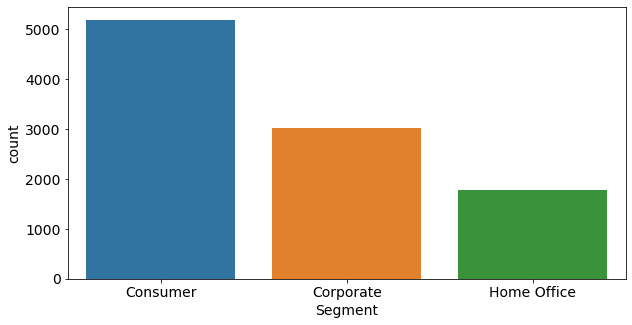

In [286]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=data.Segment)
plt.show();

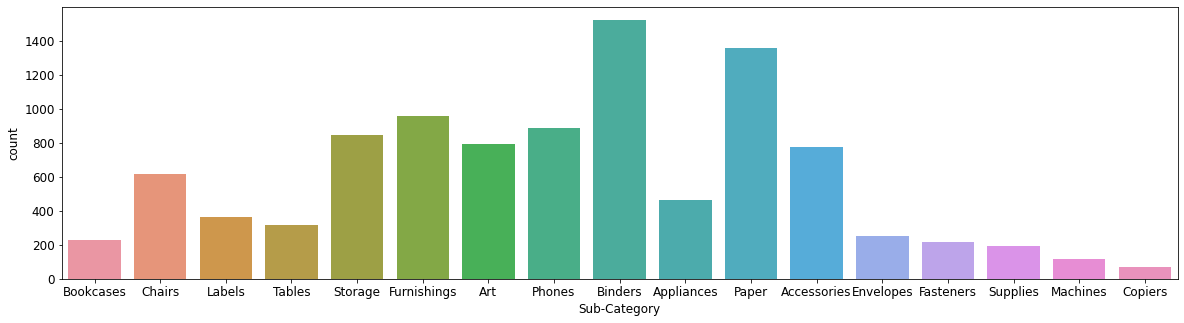

In [287]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Sub-Category',data=data)
plt.show()
#From the above data, it’s very much clear that the Copiers and Machines Subcategory needs improvement.

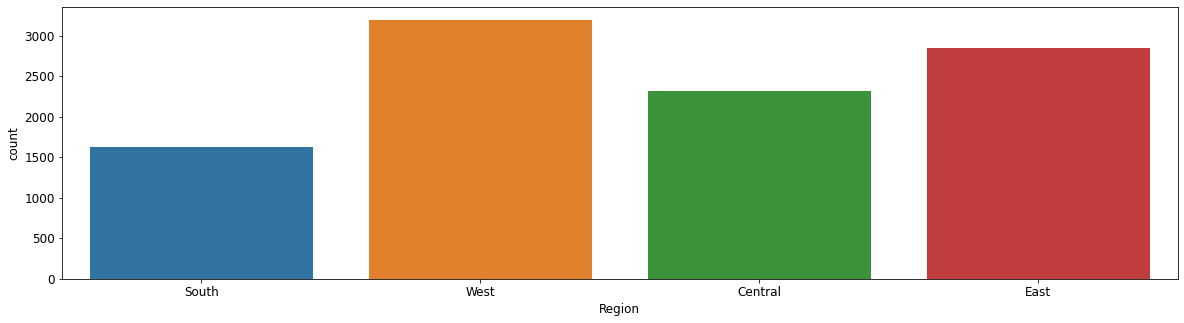

In [288]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Region',data=data)
plt.show()
#If we look into the data region-wise, we can conclude that the south region needs more improvement compared to others.

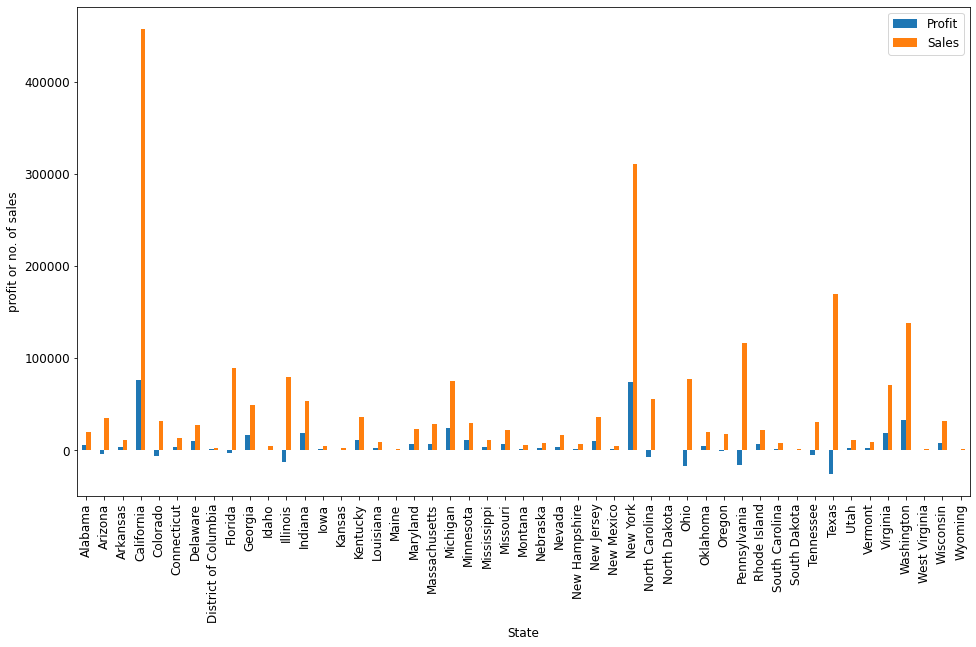

In [289]:
data.groupby(['State'])[['Profit','Sales']].sum().plot.bar(figsize=(16,9))
plt.ylabel('profit or no. of sales')
plt.legend(loc=1)
plt.show()

## Findings

`1. The main reason which leads to loss is Discount as if some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts, hence it needs to be improved.
2. It is better to give more discounts during festival seasons, additionally, that will result in more sales.
3. The Home office segment needs better improvement.
4. Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.
5. Texas, Ohio and Illinois are the States in high loss.
6. copies, accessories,paper gives more profit so increase sales of office suppliers.`

## Conclusion
`1. Product must be sell with minimum or no discount to get the best profit.
2. minimize the supply of Tables and Bookcases and try to increase of chair and furnishings.
3. Phones also give more profit so increase sales of technology.`